<a href="https://colab.research.google.com/github/kvs23/ML/blob/main/MNIST_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


In [ ]:
(Xtrain,Ytrain),(Xtest,Ytest) = mnist.load_data()

In [ ]:
Xtrain.shape,Ytrain.shape,Ytest.shape

((60000, 28, 28), (60000,), (10000,))

In [ ]:
#reshaping the Data
xtrain=Xtrain.reshape(-1,784)
xtest=Xtest.reshape(-1,784)


In [ ]:
xtrain.shape

(60000, 784)

In [ ]:
##converting y in one hot encoded
ytrain=np.zeros([60000,10])
for i in range(60000):
    ytrain[i,Ytrain[i]]=1
ytest=np.zeros([10000,10])
for i in range(10000):
    ytest[i,Ytest[i]]=1

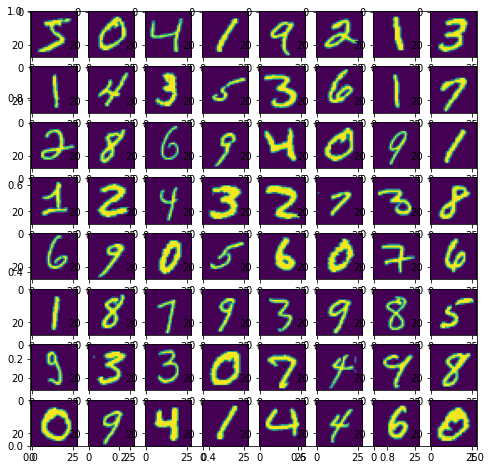

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(Xtrain[i])

In [ ]:
##initializing the parameters
inputpixels=784
input_height=28
input_width=28
input_channels=1

ncv1=32
ncv1k=5
s1=1
maxpool1=2

ncv2=64
ncv2k=5
s2=1
maxpool2=2

n_hidden=1024
n_classes=10

input_size_to_hidden=(input_width*input_height*ncv2)//((maxpool1*maxpool2)**2)

In [ ]:
##initializing the weights and bias
weights={
    'cv1':tf.Variable(tf.random.normal([ncv1k,ncv1k,input_channels,ncv1])),
    'cv2':tf.Variable(tf.random.normal([ncv2k,ncv2k,ncv1,ncv2])),
    'h1':tf.Variable(tf.random.normal([input_size_to_hidden,n_hidden])),
    'out':tf.Variable(tf.random.normal([n_hidden,n_classes]))
}

bias={
    'cv1':tf.Variable(tf.random.normal([ncv1])),
    'cv2':tf.Variable(tf.random.normal([ncv2])),
    'h1':tf.Variable(tf.random.normal([n_hidden])),
    'out':tf.Variable(tf.random.normal([n_classes]))
    
}

In [ ]:
x=tf.placeholder("float",[None,inputpixels])
y=tf.placeholder("float",[None,n_classes])


In [ ]:
##functions
def conv(x,weights,bias,k):
    out=tf.nn.conv2d(x,weights,padding="SAME",strides=[1,k,k,1])
    out=tf.nn.bias_add(out,bias)
    out=tf.nn.relu(out)
    return out
def maxpooling(x,k=2):
    return tf.nn.max_pool(x,padding="SAME",ksize=[1,k,k,1],strides=[1,k,k,1])

In [ ]:
def forwardcnn(x,weights,bias):
    xnew=tf.reshape(x,shape=[-1,input_height,input_width,1])
    c1=conv(xnew,weights["cv1"],bias['cv1'],s1)
    c1pool=maxpooling(c1,maxpool1)
    
    c2=conv(c1pool,weights["cv2"],bias['cv2'],s2)
    c2pool=maxpooling(c2,maxpool2)
    
    X_hidden=tf.reshape(c2pool,shape=[-1,input_size_to_hidden])
    hidden=tf.add(tf.matmul(X_hidden,weights["h1"]),bias['h1'])
    houtput=tf.nn.relu(hidden)
    
    output=tf.add(tf.matmul(houtput,weights['out']),bias['out'])
    return output
    
    

In [ ]:
pred=forwardcnn(x,weights,bias)

In [ ]:
#costfunction
J=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y))

In [ ]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(J)

In [ ]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())


In [ ]:
##backward propagation
for i in range(10):
    c,a=sess.run([J,optimize],feed_dict={x:xtrain,y:ytrain})
    print(c)

In [ ]:
predictions =tf.argmax(pred,1)
correctlabels=tf.argmax(y,1)
predval=sess.run(predictions,feed_dict={x:xtest})
correctpredictions=tf.equal(predval,correctlabels)
correct=sess.run(correctpredictions,feed_dict={y:ytest})
print(correct.sum()/10000)

0.1184
